<img src="./Logo_UNSAM.png" align="right" width="150" />

#### Procesamiento Digital de Señales
# Trabajo Práctico Nº1
#### Lucas Marú


# Introducción
En este primer trabajo vamos a poner en funcionamiento un código que nos permita generar funciones senoidales.

# Consideraciones
La tarea consiste en programar una función que genere señales senoidales y que permita 
parametrizar:

* La amplitud máxima de la senoidal (volts)
* Su valor medio (volts)
* La frecuencia (Hz)
* La fase (radianes)
* La cantidad de muestras digitalizada por el ADC (# muestras)
* La frecuencia de muestreo del ADC.

Es decir que la función que uds armen debería admitir ser llamada de la 
siguiente manera:
tt, xx = mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)

Text(0.5, 1.0, 'fo=2001hz')

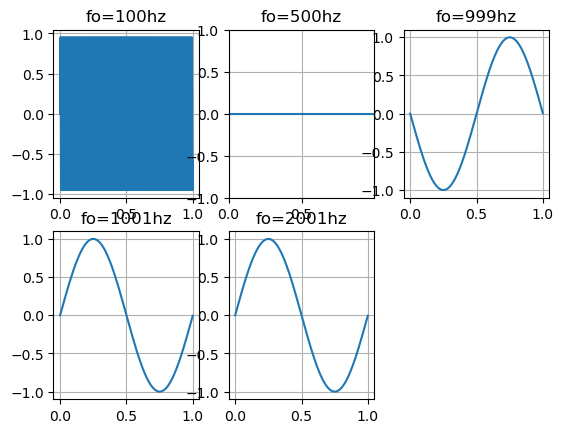

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Spyder

@author: Lucas Marú
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#%% Declaramos nuestra funcion
def gen_senoidal(Vmax, dc, f0, ph, nn, fs):
    #el tiempo de sampleo me lo da la fs
    ts=1/fs
    #armo el eje temporal, no termino de entende "(N-1)*ts"
    tt = np.linspace(0, (nn-1)*ts, nn).flatten()
    sen_gen = Vmax * np.sin(2 * np.pi *f0 * tt + ph)
    return (tt , sen_gen)

#señal cómodamente muestreada según el criterio que definimos
(t0 , y0) = gen_senoidal(Vmax=1, dc=0, f0=100, ph=0, nn=1000, fs=1000)
#Señal en el lìmite teórico
(t1 , y1) = gen_senoidal(Vmax=1, dc=0, f0=500, ph=0, nn=1000, fs=1000)
#Excedidas del límite teórico
(t2 , y2) = gen_senoidal(Vmax=1, dc=0, f0=999, ph=0, nn=1000, fs=1000)
(t3 , y3) = gen_senoidal(Vmax=1, dc=0, f0=1001, ph=0, nn=1000, fs=1000)
(t4 , y4) = gen_senoidal(Vmax=1, dc=0, f0=2001, ph=0, nn=1000, fs=1000)

plt.figure(1)
plt.subplot(2,3,1)
seno0 = plt.plot(t0, y0)
plt.grid() # Activa grilla en el gráfico
plt.title('fo=100hz') # Título

plt.subplot(2,3,2)
seno1 = plt.plot(t1, y1)
plt.grid() # Activa grilla en el gráfico
plt.title('fo=500hz') # Título
plt.axis([min(t1), max(t1), -1, 1])#fijo el eje y para que sea igual en cada grafico

plt.subplot(2,3,3)
seno2 = plt.plot(t2, y2)
plt.grid() # Activa grilla en el gráfico
plt.title('fo=999hz') # Título

plt.subplot(2,3,4)
seno3 = plt.plot(t3, y3)
plt.grid() # Activa grilla en el gráfico
plt.title('fo=1001hz') # Título

plt.subplot(2,3,5)
seno4 = plt.plot(t4, y4)
plt.grid() # Activa grilla en el gráfico
plt.title('fo=2001hz') # Título


Se graficaron 5 señales identicas a las salvo por la frecuencia de la misma. Las frecuencias utilizadas fueron las siguientes:
* f0=100hz, señal cómodamente muestreada según los criterios definidos en clase.
* f1=500hz, señal en el límite de Nyquist.
* f2=999hz, esta y las siguientes dos ya están muy excedidas del límite teórico .
* f3=1001hz
* f4=2001hz

# Conclusiones
Todas las señales poseen mismos parametros para Amplitud (1 volt), valor medio o dc (0v), fase (nula), cantidad de muestras 1000 y frecuencia de sampleo (1 Khz).
* En f0 vemos los 100 ciclos esperados con 10 muestras por ciclo.
* En f1 tenemos dos muestras por ciclo, el grafico obtenido es el esperado cuando la fase es nula.
* En f2 la señal solo tiene un ciclo, es una senoidal bien definida y se invierte. No entiendo bien el porque del comportamiento. Queda para consultar la siguiente clase.
* En f3 y f4 el comportamiento es identico, lo que puede sugerir una periodicidad cada 1000hz pero las razones me son esquivas, queda también como duda. 